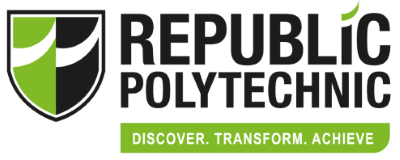
<h1>
    <center>TIPP - AAI Assignement (Python for Data Science)</center>
    <center>Due Due: 31st January 2020</center>
</h1>
<h3>
    <center>Submitted By: Koay Seng Tian</center></h4>
    <center>Email: sengtian@yahoo.com</center></h4>
</h3>

In [1]:
# show the versions of modules/packages imported
from platform import python_version

import matplotlib
import numpy
import PIL
import skimage
import sys

print('Version(s):\n')
print('python =', python_version())

print('mathplotlib =', matplotlib.__version__)
print('numpy =', numpy.__version__)
print('Pillow =', PIL.__version__)
print('skimage =', skimage.__version__)
print('sys = ', sys.version)


Version(s):

python = 3.7.5
mathplotlib = 2.2.3
numpy = 1.17.4
Pillow = 7.0.0
skimage = 0.15.0
sys =  3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]


# Question 1
A vineyard owner is planting several new rows of grapevines, and needs to know how many grapevines to plant in each row. She has determined that after measuring the length of a future row, she can use the following formula to calculate the number of vines that will fit in the row, along with the trellis end-post assemblies that will need to be constructed at each end of the row:

\begin{equation}V = \frac{R - 2E}{S} \end{equation}

The terms in the formula are:
- V is the number of grapevines that will fit in the row.
- R is the length of the row, in feet.
- E is the amount of space, in feet, used by an end-post assembly. 
- S is the space between vines, in feet.

Write a script that makes the calculation for the vineyard owner. The program should ask the user to input the following:
- The length of the row, in feet.
- The amount of space used by an end-post assembly, in feet.
- The amount of space between the vines, in feet.

Once the input data has been entered, the program should calculate and display the number of grapevines that will fit in the row.

In [2]:
# calculate the number of vinces that will fit in the row along with the trellis 
# end-post assemblies that will need to be constrcuted at each end of the row.

def calculateGrapevinesNumber(r, e, s):
    return (r - (2 * e))/(s)

def getInput(message, zeroAllowed=False):
    loop = True
    while loop:
        
        # test the input is not zero
        try:
            i = float(input(message))
        except ValueError:
            print('You have entered an invalid number.  Please try again!\n')
            continue
            
        # test input is not zero (when zeroAllowed=False) 
        # in order not to cause division by zero error
        if not zeroAllowed:
            try:
                test = 1/i
            except ZeroDivisionError:
                print('You have entered a zero.  Please try again!\n')
                continue
                        
        # all tests passed, no lopping is needed
        loop = False
        
    return i

print('Note: Enter the measurements in feet\n')
rowLength = getInput('Enter the length of row\t\t\t\t\t: ')

# test numerator (R - 2E) is not less or equal zero
while True:
    endpostAssembly = getInput('Enter the amount of space used by an end-post assembly\t: ')
    if (rowLength - (2 * endpostAssembly)) < 0.:
        print('Too much space used by an end-post assembly.  Please try again!\n')
    else:
        break  
        
spaceBetweenVines = getInput('Enter the amount of space between the vines\t\t: ')

grapevinesNumber = calculateGrapevinesNumber(rowLength, endpostAssembly, spaceBetweenVines)
print('\nNumber of grapevines to fit in the row is {:.2f}.'.format(grapevinesNumber))

Note: Enter the measurements in feet

Enter the length of row					: 20
Enter the amount of space used by an end-post assembly	: 5
Enter the amount of space between the vines		: 5

Number of grapevines to fit in the row is 2.00.


# Question 2
A class has two tests worth 25 points each along with a main exam worth 50 points.  For a student to pass the class, they must obtain an overall score of at least 50 points, and must obtain at least 25 points in the main exam. If a student’s total score is less than 50 or they obtain less than 25 points in the main exam, they receive a grade of “Fail”. Otherwise, their grade is as follows:

- If they get more than 80, they get a grade of “Distinction”. 50–59 = “Pass”.
- If they get less than 80 but more than 60, they get a “Credit” grade.
- If they get less than 60, they get a ”Pass” grade.

Write a script that prompts the user to enter their points for both tests and the exam and converts the values to integers. The script should first check if the points entered for the tests and exam are valid. If any of the test scores are not between 0 and 25, or the exam score is not between 0 and 50, the script should display an error message.

Otherwise, the script should display the total points and the grade.

In [3]:
# get the marks of test and/or exam
# also check the mark entered is in the range
def getMark(message, low=0, high=100):
    while True:
        try:
            m = int(input(message))
            
            # if the mark entered is not in the 
            if not m in range(low, high+1):
                print('The point is not in between {} and {}.  Please try again!\n'.format(low, high))
                continue
        except ValueError:
            # Re-entered the mark if the input cannot be converted to integer
            print('You have entered an invalid point.  Please try again!\n')
            continue
        break
    return m

# determine student's grade is Distinction, Pass, Credit or Fail
def determineGrade(t1, t2, ex, total, examPassPts=25, distinctionL=80, creditL=60, passL=50, fullMark=100):
    
    if ex < examPassPts:
        return 'Fail'
    elif total in range(distinctionL, fullMark+1):
        return 'Distinction'
    elif total in range(creditL, distinctionL):
        return 'Credit'
    elif total in range(passL, creditL):
        return 'Pass'
    else:
        return 'Fail'

test1 = getMark('Enter the FIRST test points\t: ', high=25)
test2 = getMark('Enter the SECOND test points\t: ', high=25)    
exam = getMark('Enter the EXAMINATION points\t: ', high=50)

totalPts = test1 + test2 + exam
print('\nThe total points is ({}) and the grade is ({}).'. \
      format(totalPts, determineGrade(test1, test2, exam, totalPts)))


Enter the FIRST test points	: 13
Enter the SECOND test points	: 13
Enter the EXAMINATION points	: 40

The total points is (66) and the grade is (Credit).


# Question 3
A “sleep debt” represents the difference between a person’s desirable and actual amount of sleep. Write a script that prompts the user to enter how many hours they slept each day over a period of seven days. Using 8 hours per day as the desirable amount of sleep, determine their sleep debt by calculating the total hours of sleep they got over the seven-day period and subtracting that from the total hours of sleep they should have got. If the user does not have a sleep debt, display a message expressing your jealousy.

In [4]:
desirableSleepHrs_perDay = 8

print('Enter the last seven days sleep hours in a single line.')
print('Example: 8 5.5 3 4 5 6 7.8\n')

while True:
    try:
        # get the 7 days of sleep hours from users and
        # convert it into a list
        sleepHrs_perWeek = list(map(float, input('Your sleep hours: ').split()))
        
        # if less than 7 days of sleep hours are entered
        # ask user to retry again
        if len(sleepHrs_perWeek) < 7:
            print('You have entered less than 7 days of sleep hours. Please try again!\n')
            continue
    except ValueError:
        print('One or more of the sleep hours entered is/are invalid. Please try again!\n')
        continue
    break
    
# if more than 7 days of sleep hours is entered only the
# first 7 days of sleep hours are used for the calculation
yourTotalSleepHrs_perWeek = sum(sleepHrs_perWeek[:7])
desirableSleepHrs_perWeek = desirableSleepHrs_perDay * 7

print('\nDesirable sleep hours per week\t: {:.2f}'.format(desirableSleepHrs_perWeek))
print('Your sleep hours per week\t: {:.2f}'.format(yourTotalSleepHrs_perWeek))

sleepDebt = desirableSleepHrs_perWeek - yourTotalSleepHrs_perWeek
if sleepDebt > 0:
    print('You needs to catch up with your sleep by another {:.2f} hour(s)'.format(sleepDebt))
elif sleepDebt == 0:
    print('You have enough sleep.  Keep it up!')
else:
    print('I am jealous! You have more than enough sleep, exceeding by {:.2f} hour(s)'.format(sleepDebt * -1))

Enter the last seven days sleep hours in a single line.
Example: 8 5.5 3 4 5 6 7.8

Your sleep hours: 8 5.5 3 4 5 6 7.8

Desirable sleep hours per week	: 56.00
Your sleep hours per week	: 39.30
You needs to catch up with your sleep by another 16.70 hour(s)


# Question 4
a. Given 2 arrays, write the code to stack them horizontally and vertically. (2 marks)

Given arrays:
```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

Desired output for stacking vertically:
#> array([[0, 1, 2, 3, 4],
#> [5, 6, 7, 8, 9],
#> [1, 1, 1, 1, 1],
#> [1, 1, 1, 1, 1]])

Desired output for stacking horizontally:
#> array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
#> [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])
```

b. Import the image from the following URL and convert it to a numpy array and use PIL’s fromarray() to display the image. (3 marks)

```python
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
```

In [5]:
#Part (a) of Question 4
import numpy as np

a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# stack the arrays vertically
c = np.vstack((a, b))

# stack the arrays horizontally
d = np.hstack((a,b))

print('+-----------+')
print(c)
print('+-----------+')

print('@---------------------@')
print(d)
print('@---------------------@')

+-----------+
[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]
+-----------+
@---------------------@
[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]
@---------------------@


In [6]:
#Part (b) of Question 4

# use scikit-image image processing, the io.imread returns a numpy array
import skimage.io

# Python Imaging Library is a free library for the Python programming language that 
# adds support for opening, manipulating, and saving many different image file formats.
from PIL import Image

# use matplotlib.pyplot to display the image 'inline'
import matplotlib.pyplot as plt
import urllib.error

# the follow class is to surpress the stack trace
# when the URL passed in to imread is incorrect
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# load the JPEG from URL and stored into an array
url = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
try:
    img_array = skimage.io.imread(url)
except urllib.error.HTTPError as err:
    print("HTTP error {0}: {1}".format(err.code, err.reason))
    raise StopExecution

# print type and size of array
#type(img_array)
#img_array.shape

img = Image.fromarray(img_array)
img.show()

# alternative way to display the image as mentioned in class
# the image is displayed "inline" in jupyter notebook
plt.imshow(img_array)
plt.axis('off')

(-0.5, 451.5, 302.5, -0.5)

# Question 5
a. Write a Python program to draw line charts of the financial data of Alphabet Inc. between October 3, 2019 to October 7, 2019. Data source: https://finance.yahoo.com/quote/GOOG/history/.  (3 marks)

b. Read face cream and facewash product sales data (http://bit.ly/35rh8VW) and show it using the bar chart. (2 marks)